In [1]:
import numpy as np
import seaborn as sns

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt

def plt_dynamic(epoch_list, avg_train_loss_list, avg_test_loss_list, ax,ticks,title):
    ax.plot(epoch_list, avg_train_loss_list, 'b', label="Train Loss")
    ax.plot(epoch_list, avg_test_loss_list, 'r', label="Test Loss")
    if len(epoch_list)==1:
        plt.legend()
        plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

In [4]:
# Network Parameters
n_hidden_1 = 512 # 1st layer number of neurons
n_hidden_2 = 128 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [5]:
# placeholders for mini-batch dataset
x_is = tf.placeholder(tf.float32, [None, 784])
y_true_is = tf.placeholder(tf.float32, [None, 10])

In [6]:
# this would be used for dropouts in dropouts section

# keep_prob: we will be using these placeholders when we use dropouts, while testing model
keep_prob = tf.placeholder(tf.float32)
# keep_prob_input: we will be using these placeholders when we use dropouts, while training model
keep_prob_input = tf.placeholder(tf.float32)

In [7]:
# Weight initialization

# sgd means sigmoidal unit. So this is the initialization for sigmoidal activation units
# SGD: Xavier/Glorot Normal initialization.
weights_sgd = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=0.039, mean=0)),    #784x512 
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=0.055, mean=0)), #512x128
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes],stddev=0.120, mean=0))  #128x10
}

# for relu activation unit
# He Normal initialization.
weights_relu = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=0.0505, mean=0)),    #784x512
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=0.0624, mean=0)), #512x128
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes],stddev=0.125, mean=0))  #128x10
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),             #512x1
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),             #128x1
    'out': tf.Variable(tf.random_normal([n_classes]))              #10x1
}

In [8]:
# Parameters
training_epochs = 15
learning_rate = 0.001  # this is value of eeettaa i.e if we use SGD optimiser then this would be fixed.
batch_size = 100 # mini-batch size for each iteration.
display_step = 1 # it is to tell, after how many epochs interval, you want to update the graph of loss Vs epochs.

<h3>STEPS :<br>
<p>    
   a) Define your y_hat_is in terms of W's , x's and in-between layers by defining your multilayer_perceptron.<br><br>
   b) Define your loss function in terms of y_hat_is and y_is.<br><br>
   c) Define/Choose the optimiser which would reduce the loss which you defined by improving W's of each layer.<br><br>
   d) In order to start training i.e in order to update W's for each layer, you have to pass your optimiser inside the sess.run() method by filling the memory of placeholders i.e by sending mini-batch dataset for x_is and y_true_is.<br><br>
   e) If you want to do something in between training then you can do that i.e plotting the graph or computing the training & test losses for each and every iteration....etc etc....so many things.<br><br>
   f) After the training, when you have got your optimal W* and b*, then you can compute accuracy on the test data.
</p>
</h3>

<h3> Model 1: input (784) - sigmoid(512) - sigmoid(128) - 
softmax(output 10) </h3>

In [11]:
# Create model (this is the place where you define architecture of layers and activation units in each of those layers)
def multilayer_perceptron(x, weights, biases):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())        
    
    # Hidden layer with Sigmoid activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) #(x*weights['h1']) + biases['b1']
    layer_1 = tf.nn.sigmoid(layer_1)
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape())        
    
    # Hidden layer with Sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) # (layer_1 * weights['h2']) + biases['b2'] 
    layer_2 = tf.nn.sigmoid(layer_2)
    print( 'layer_2:', layer_2.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b3:', biases['out'].get_shape())        
    
    # Output layer with Softmax activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] # (layer_2 * weights['out']) + biases['out']    
    out_layer = tf.nn.softmax(out_layer)
    print('out_layer:',out_layer.get_shape())

    return out_layer  

<h5> __ Model 1 + AdamOptimizer __ (Sigmoid + Adam) </h5>

In [12]:
# Since we are using sigmoid activations in hiden layers we will be using weights that are initalized as weights_sgd
y_hat_sgd = multilayer_perceptron(x_is, weights_sgd, biases) # this is final y_hat_is.

# this is loss function for sigmoid activation units, in hidden layers.
cost_sgd = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_hat_sgd, labels = y_true_is))

# there are many other optimizers available (these are the optimisers, which would reduce cost_sgd)
optimizer_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_sgd)
optimizer_sgdc = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_sgd)

# ? means that you have to pass mini-batch dataset, at the time of actual training.

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 128) b[h2]: (128,)
layer_2: (?, 128) W[out]: (128, 10) b3: (10,)
out_layer: (?, 10)


<IPython.core.display.Javascript object>


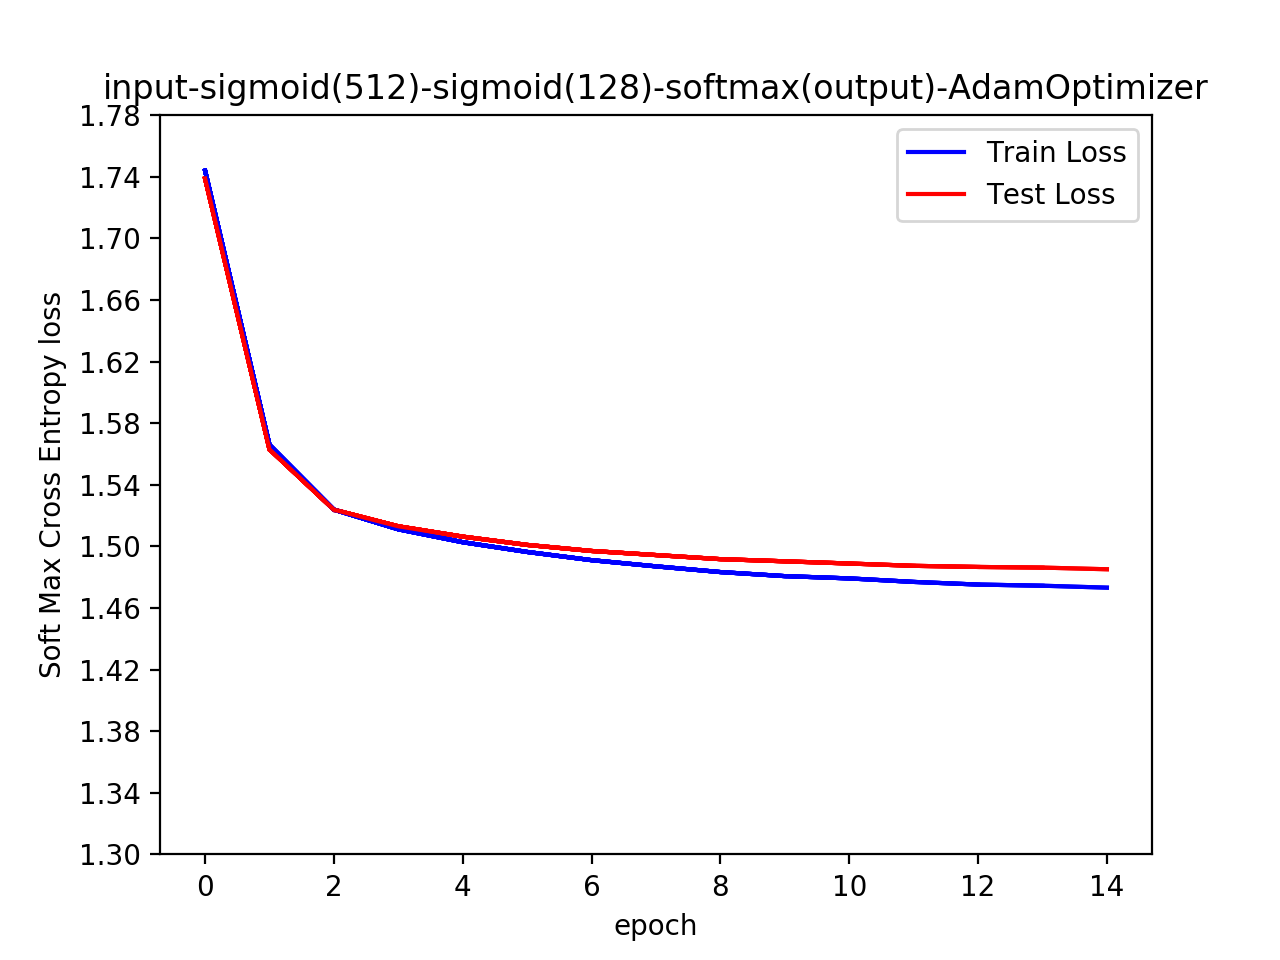

Epoch: 0001 train cost=1.743989796 test cost=1.738883452
Epoch: 0002 train cost=1.565878790 test cost=1.563005021
Epoch: 0003 train cost=1.523870293 test cost=1.523818077
Epoch: 0004 train cost=1.511105274 test cost=1.513044596
Epoch: 0005 train cost=1.502721435 test cost=1.506343676
Epoch: 0006 train cost=1.496396777 test cost=1.500966778
Epoch: 0007 train cost=1.491060949 test cost=1.497034361
Epoch: 0008 train cost=1.487042911 test cost=1.494378886
Epoch: 0009 train cost=1.483332750 test cost=1.491722261
Epoch: 0010 train cost=1.480701127 test cost=1.490322949
Epoch: 0011 train cost=1.479217272 test cost=1.488887733
Epoch: 0012 train cost=1.476943645 test cost=1.487387728
Epoch: 0013 train cost=1.475218182 test cost=1.486654168
Epoch: 0014 train cost=1.474473853 test cost=1.486231455
Epoch: 0015 train cost=1.473215274 test cost=1.485158616
Accuracy: 0.9771


In [13]:
with tf.Session() as sess:
    
    # initializing all the weights and biases i.e of all the layers
    tf.global_variables_initializer().run()
    
    # for plotting graph
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    epochs_list, avg_train_loss_list, avg_test_loss_list = [], [], []
    
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here c: corresponds to the parameter cost_sgd
            # w : corresponds to the parameter weights_sgd
            # c = sess.run() returns the cost after every batch during train --> this is training error after the iteration
            # w = sess.run() returns the weights that are modified after every batch through Back prop
            # w is dict w = {'h1': updated h1 weight vector after the current batch,
            #                'h2': updated h2 weight vector after the current batch, 
            #                'out': updated output weight vector after the current batch, 
            #                }
            # you check these w matrix for every iteration, and check whats happening during back prop
            #
            # note: sess.run() returns parameter values based on the input parameters
            # feed_dict={x_is: batch_xs, y_true_is: batch_ys} here x_is, y_true_is should be placeholders
            # x_is, y_true_is are the input parameters on which the model gets trained.

            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_adam, cost_sgd,weights_sgd], feed_dict={x_is: batch_xs, y_true_is: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_sgd, feed_dict={x_is: mnist.test.images, y_true_is: mnist.test.labels})
            test_avg_cost += c / total_batch

        epochs_list.append(epoch)
        avg_train_loss_list.append(train_avg_cost)
        avg_test_loss_list.append(test_avg_cost)
        plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-softmax(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-softmax(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_hat_sgd,1), tf.argmax(y_true_is,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x_is: mnist.test.images, y_true_is: mnist.test.labels}))

<IPython.core.display.Javascript object>


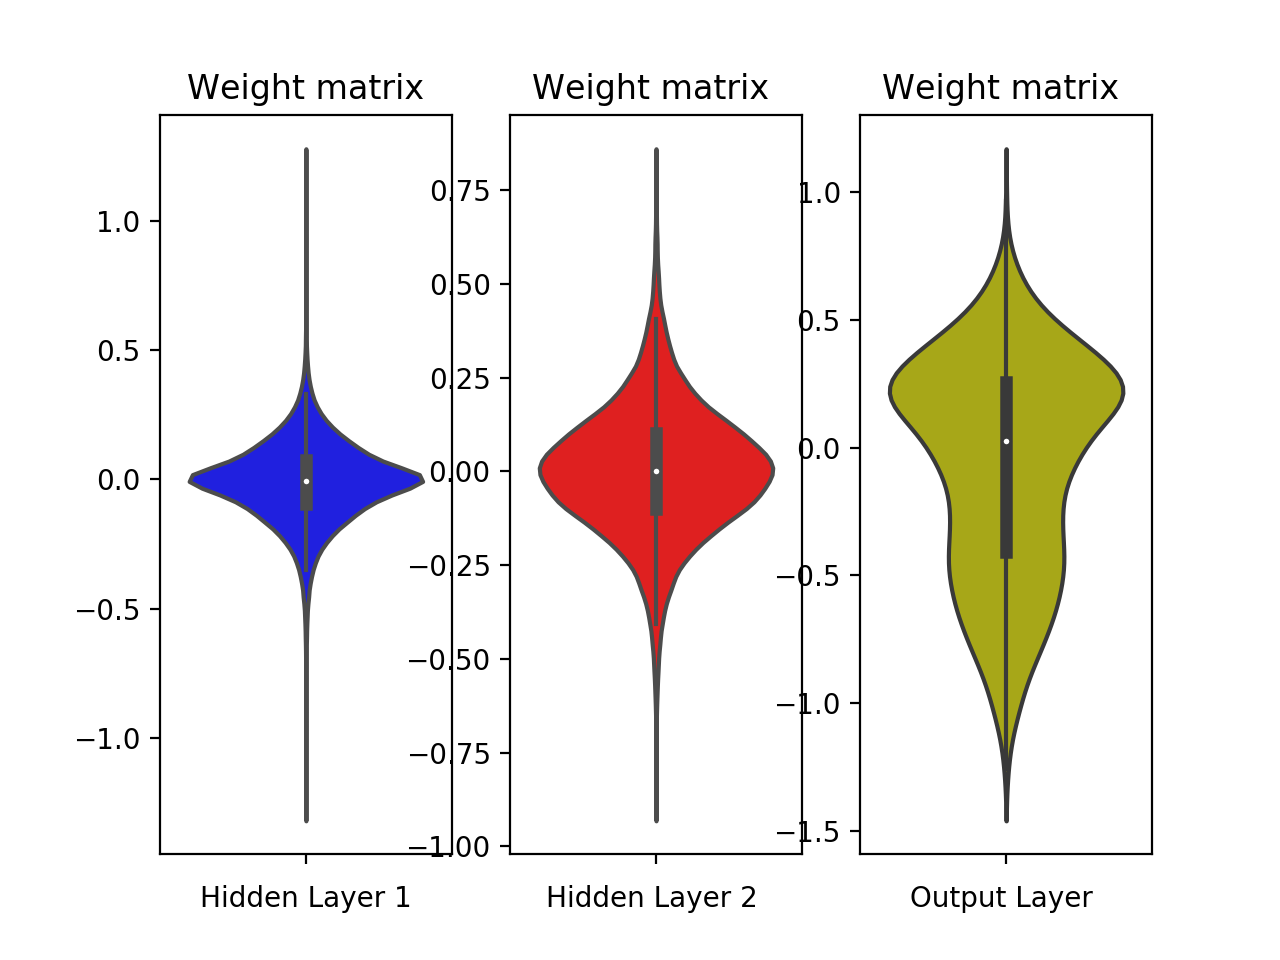

In [14]:
# Plot weight distriubtion at the end of training.

h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)
# (-1,1) --> we did this because we want to plot weights on y-axis 

fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h4> __ Model 1 + GradientDescentOptimizer __ (Sigmoid + SDG) </h4>

<IPython.core.display.Javascript object>


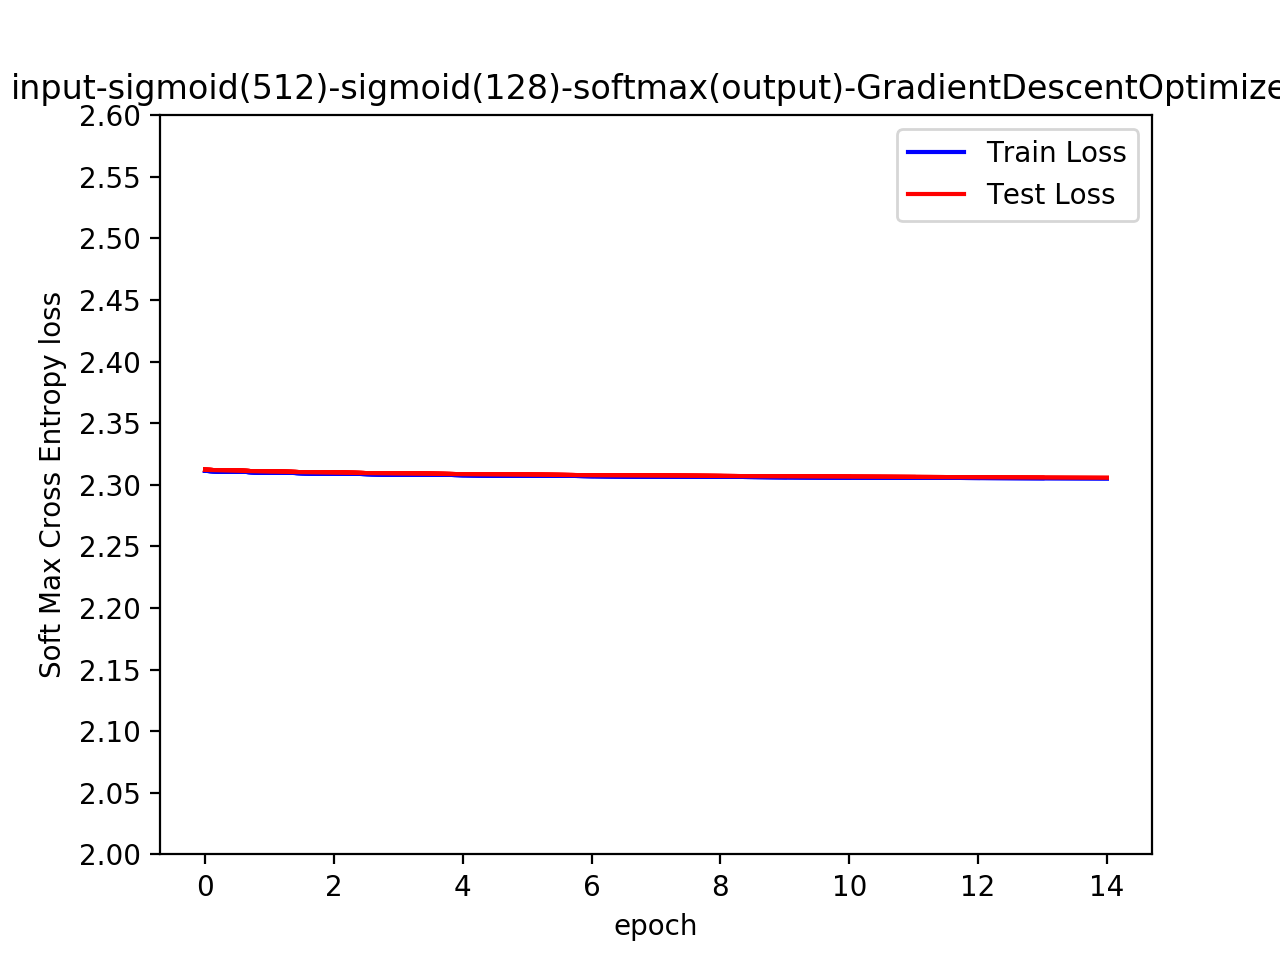

Epoch: 0001 train cost=2.311317320 test cost=2.312126319
Epoch: 0002 train cost=2.309973115 test cost=2.310716522
Epoch: 0003 train cost=2.309102854 test cost=2.309851103
Epoch: 0004 train cost=2.308454263 test cost=2.309158203
Epoch: 0005 train cost=2.307932441 test cost=2.308638563
Epoch: 0006 train cost=2.307493600 test cost=2.308187497
Epoch: 0007 train cost=2.307116246 test cost=2.307791663
Epoch: 0008 train cost=2.306785620 test cost=2.307463225
Epoch: 0009 train cost=2.306489775 test cost=2.307158923
Epoch: 0010 train cost=2.306221347 test cost=2.306880172
Epoch: 0011 train cost=2.305974699 test cost=2.306612516
Epoch: 0012 train cost=2.305744706 test cost=2.306373620
Epoch: 0013 train cost=2.305527221 test cost=2.306152930
Epoch: 0014 train cost=2.305320591 test cost=2.305930872
Epoch: 0015 train cost=2.305123484 test cost=2.305722688
Accuracy: 0.1028


In [15]:
# We can now launch the model in an InteractiveSession

# We first have to create an operation to initialize the variables we created:
# Note: make sure you initialize variables after AdamOptimizer  --> this is very important, don't forget

with tf.Session() as sess:
    
    # initializing all the weights and biases i.e of all the layers
    tf.global_variables_initializer().run() # --> V.V. IM
    
    # for plotting graph
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    epochs_list, avg_train_loss_list, avg_test_loss_list = [], [], []
    
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here we use GradientDescentOptimizer
            _, c, w = sess.run([optimizer_sgdc, cost_sgd,weights_sgd], feed_dict={x_is: batch_xs, y_true_is: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_sgd, feed_dict={x_is: mnist.test.images, y_true_is: mnist.test.labels})
            test_avg_cost += c / total_batch

        epochs_list.append(epoch)
        avg_train_loss_list.append(train_avg_cost)
        avg_test_loss_list.append(test_avg_cost)
        plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax, np.arange(2, 2.6, step=0.05), "input-sigmoid(512)-sigmoid(128)-softmax(output)-GradientDescentOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax, np.arange(2, 2.6, step=0.05), "input-sigmoid(512)-sigmoid(128)-softmax(output)-GradientDescentOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_hat_sgd,1), tf.argmax(y_true_is,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x_is: mnist.test.images, y_true_is: mnist.test.labels}))


<IPython.core.display.Javascript object>


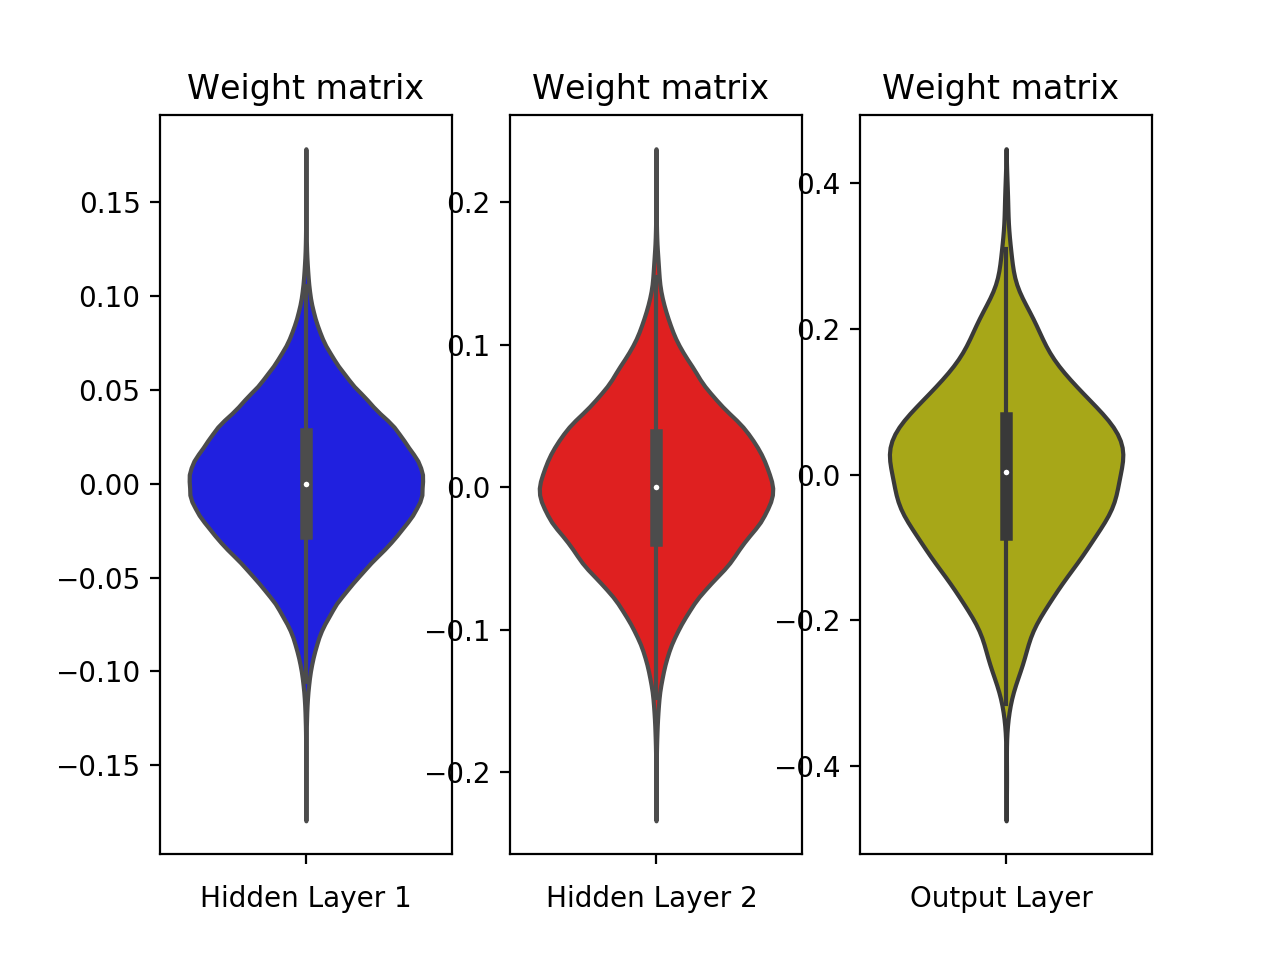

In [16]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Model 2: input (784) - ReLu(512) - ReLu(128) - Softmax(output 10) </h3>

In [17]:
# Create model (this is the place where you define architecture of layers and activation units in each of those layers)
def multilayer_perceptron_relu(x, weights, biases):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())        
    
    # Hidden layer with ReLu activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) #(x*weights['h1']) + biases['b1']
    layer_1 = tf.nn.relu(layer_1)
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape())        
    
    # Hidden layer with ReLu activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) # (layer_1 * weights['h2']) + biases['b2'] 
    layer_2 = tf.nn.relu(layer_2)
    print( 'layer_2:', layer_2.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b3:', biases['out'].get_shape())        
    
    # Output layer with Sigmoid activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] # (layer_2 * weights['out']) + biases['out']    
    out_layer = tf.nn.softmax(out_layer)
    print('out_layer:',out_layer.get_shape())

    return out_layer

<h5> __ Input-ReLu(512)-ReLu(128)-Softmax(output) - AdamOptimizer  __ (ReLU + Adam) </h5>

In [18]:
# Since we are using Relu activations in hiden layers we will be using weights that are initalized as weights_relu
y_hat_relu = multilayer_perceptron_relu(x_is, weights_relu, biases)

# this is loss function for ReLU activation units, in hidden layers.
cost_relu = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_hat_relu, labels = y_true_is))

# there are many optimizers available (these are the optimisers, which would reduce cost_relu)
optimizer_relu_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_relu)
optimizer_relu_sgdc = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_relu)

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 128) b[h2]: (128,)
layer_2: (?, 128) W[out]: (128, 10) b3: (10,)
out_layer: (?, 10)


<IPython.core.display.Javascript object>


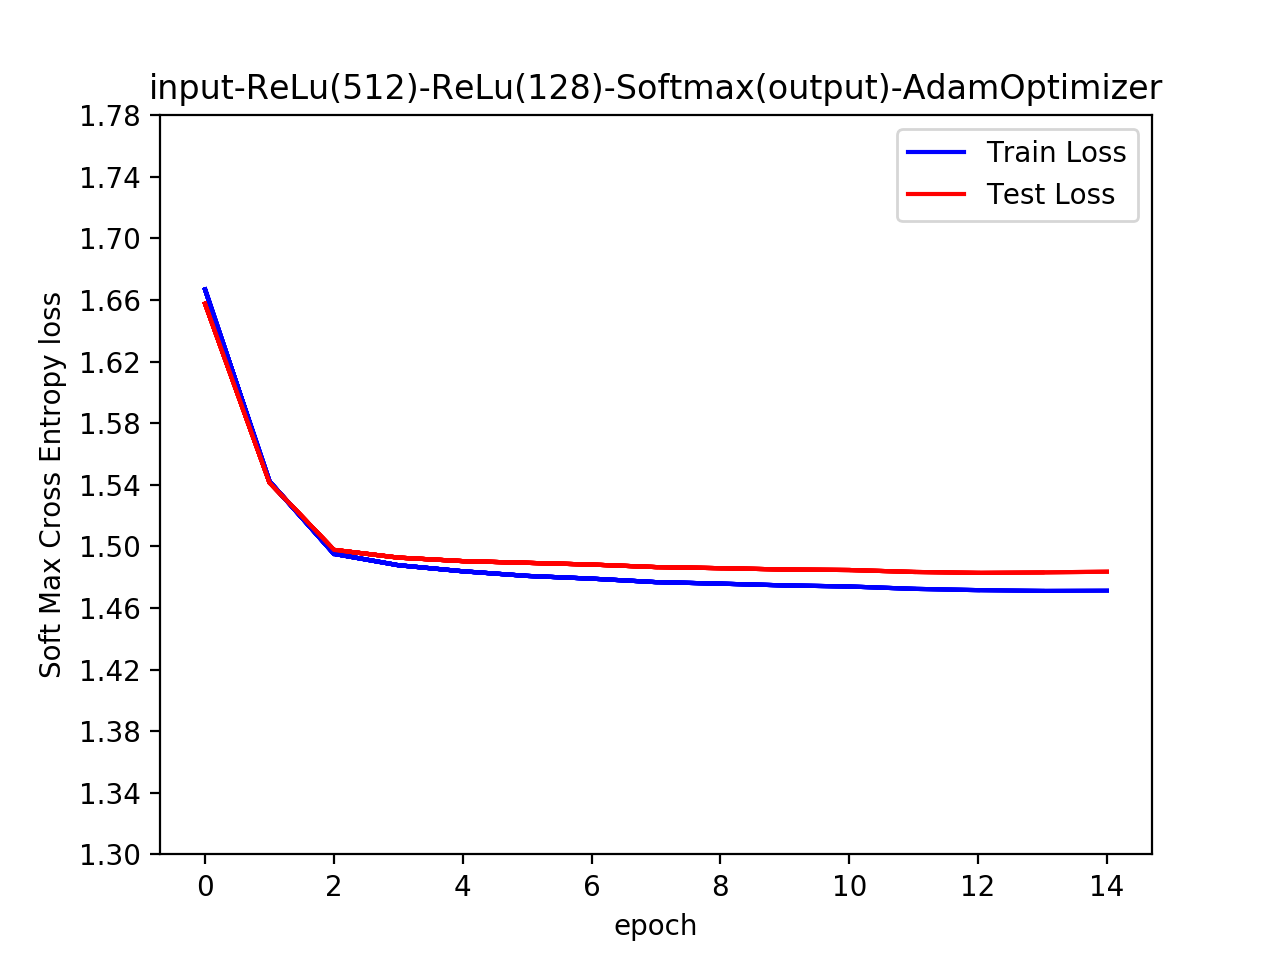

Epoch: 0001 train cost=1.666817646 test cost=1.657573188
Epoch: 0002 train cost=1.542223652 test cost=1.541448270
Epoch: 0003 train cost=1.495161465 test cost=1.497736100
Epoch: 0004 train cost=1.487779498 test cost=1.492715787
Epoch: 0005 train cost=1.483844628 test cost=1.490446320
Epoch: 0006 train cost=1.480841357 test cost=1.489323653
Epoch: 0007 train cost=1.479064406 test cost=1.488205377
Epoch: 0008 train cost=1.476804047 test cost=1.486569459
Epoch: 0009 train cost=1.475803491 test cost=1.485853948
Epoch: 0010 train cost=1.474673021 test cost=1.484998384
Epoch: 0011 train cost=1.473967974 test cost=1.484663539
Epoch: 0012 train cost=1.472443687 test cost=1.483411542
Epoch: 0013 train cost=1.471599585 test cost=1.482809434
Epoch: 0014 train cost=1.471103929 test cost=1.483087296
Epoch: 0015 train cost=1.471275455 test cost=1.483590337
Accuracy: 0.9742


In [19]:
with tf.Session() as sess:
    
    # initializing all the weights and biases i.e of all the layers
    tf.global_variables_initializer().run()
    
    # for plotting graph
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    epochs_list, avg_train_loss_list, avg_test_loss_list = [], [], []
    
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_relu_adam, cost_relu, weights_relu], feed_dict={x_is: batch_xs, y_true_is: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_relu, feed_dict={x_is: mnist.test.images, y_true_is: mnist.test.labels})
            test_avg_cost += c / total_batch

        epochs_list.append(epoch)
        avg_train_loss_list.append(train_avg_cost)
        avg_test_loss_list.append(test_avg_cost)
        plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax, np.arange(1.3, 1.8, step=0.04), "input-ReLu(512)-ReLu(128)-Softmax(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax, np.arange(1.3, 1.8, step=0.04), "input-ReLu(512)-ReLu(128)-Softmax(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_hat_relu,1), tf.argmax(y_true_is,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x_is: mnist.test.images, y_true_is: mnist.test.labels}))

<IPython.core.display.Javascript object>


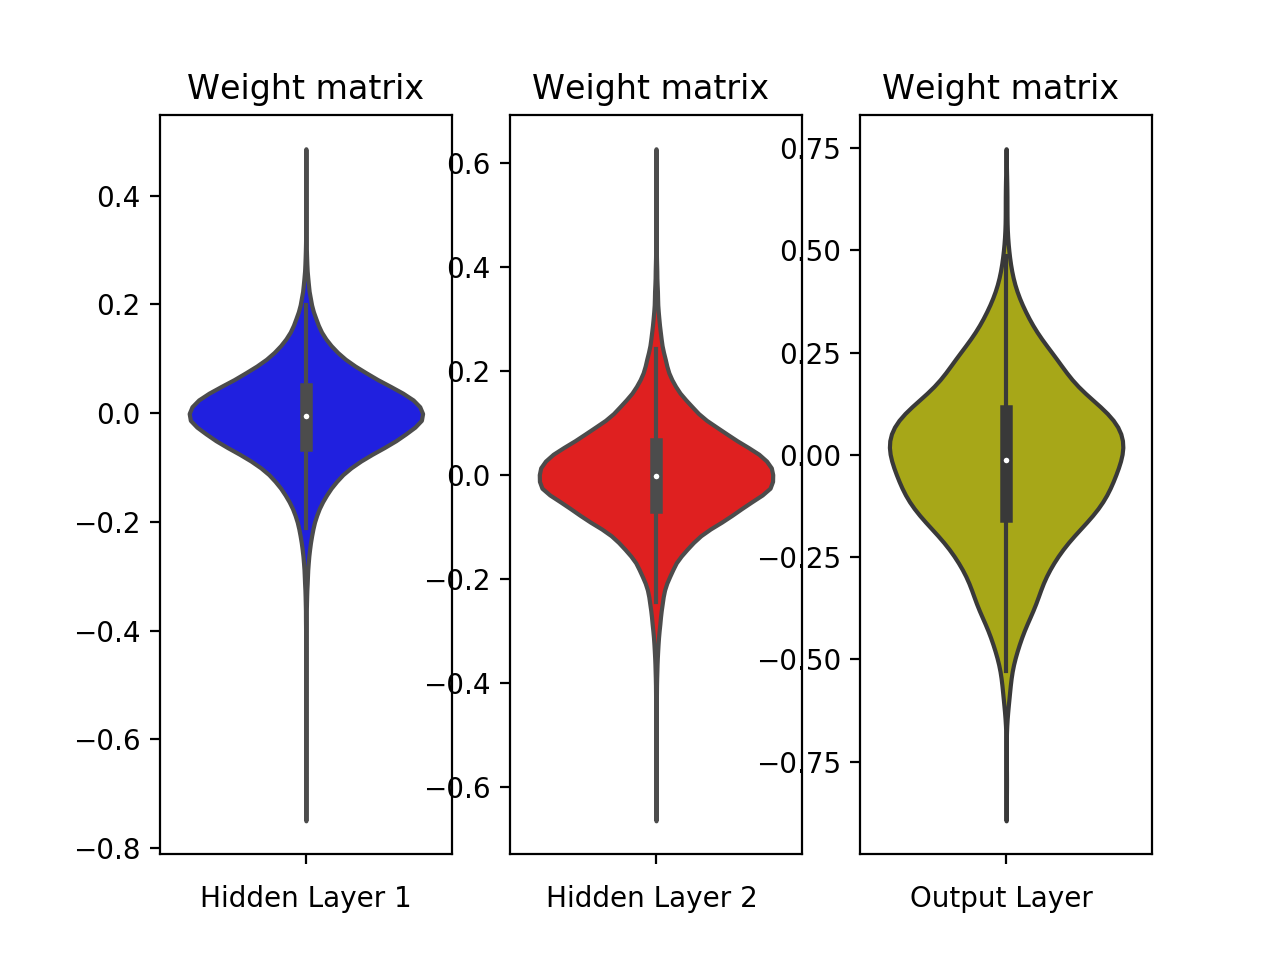

In [20]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h5>__Input-ReLu(512)-ReLu(128)-Softmax(output) - GradientDescentOptimizer__ (ReLU + SGD)</h5>

<IPython.core.display.Javascript object>


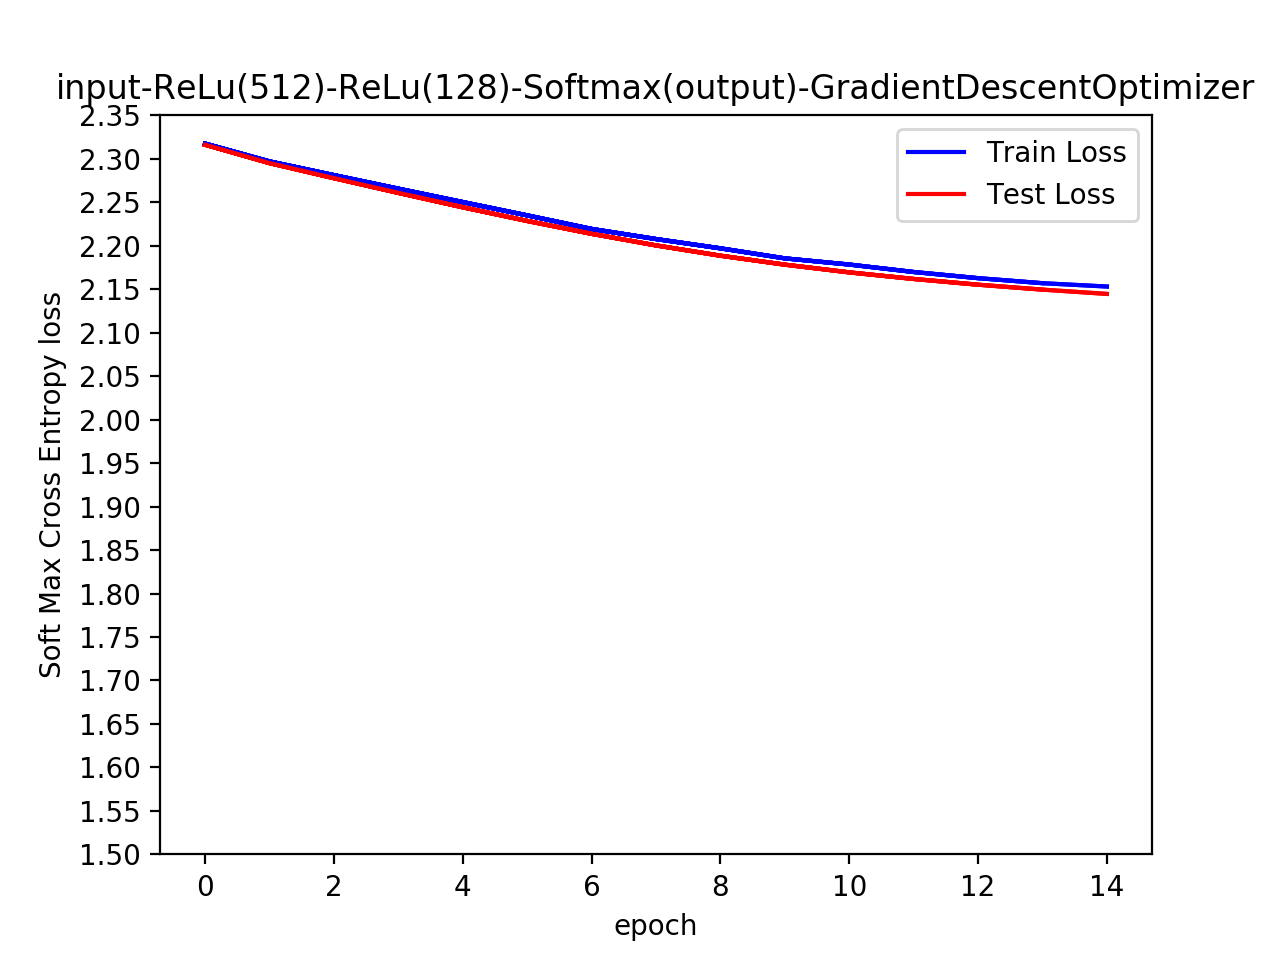

Epoch: 0001 train cost=2.317306793 test cost=2.316082048
Epoch: 0002 train cost=2.296831546 test cost=2.294951543
Epoch: 0003 train cost=2.281056209 test cost=2.277648027
Epoch: 0004 train cost=2.265489165 test cost=2.260722963
Epoch: 0005 train cost=2.250097363 test cost=2.244126802
Epoch: 0006 train cost=2.234810561 test cost=2.228433401
Epoch: 0007 train cost=2.219224821 test cost=2.213634854
Epoch: 0008 train cost=2.207591112 test cost=2.200280762
Epoch: 0009 train cost=2.196918327 test cost=2.188440207
Epoch: 0010 train cost=2.185368306 test cost=2.178153723
Epoch: 0011 train cost=2.178279842 test cost=2.169271309
Epoch: 0012 train cost=2.169701412 test cost=2.161691478
Epoch: 0013 train cost=2.162619159 test cost=2.155087130
Epoch: 0014 train cost=2.156824777 test cost=2.149425710
Epoch: 0015 train cost=2.152993070 test cost=2.144501116
Accuracy: 0.3462


In [22]:
with tf.Session() as sess:
    
    # initializing all the weights and biases i.e of all the layers
    tf.global_variables_initializer().run()
    
    # for plotting graph
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    epochs_list, avg_train_loss_list, avg_test_loss_list = [], [], []
    
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here we use GradientDescentOptimizer
            _, c, w = sess.run([optimizer_relu_sgdc, cost_relu, weights_relu], feed_dict={x_is: batch_xs, y_true_is: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_relu, feed_dict={x_is: mnist.test.images, y_true_is: mnist.test.labels})
            test_avg_cost += c / total_batch

        epochs_list.append(epoch)
        avg_train_loss_list.append(train_avg_cost)
        avg_test_loss_list.append(test_avg_cost)
        plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax, np.arange(1.5, 2.4, step=0.05), "input-ReLu(512)-ReLu(128)-Softmax(output)-GradientDescentOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax, np.arange(1.5, 2.4, step=0.05), "input-ReLu(512)-ReLu(128)-Softmax(output)-GradientDescentOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_hat_relu,1), tf.argmax(y_true_is,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x_is: mnist.test.images, y_true_is: mnist.test.labels}))

<IPython.core.display.Javascript object>


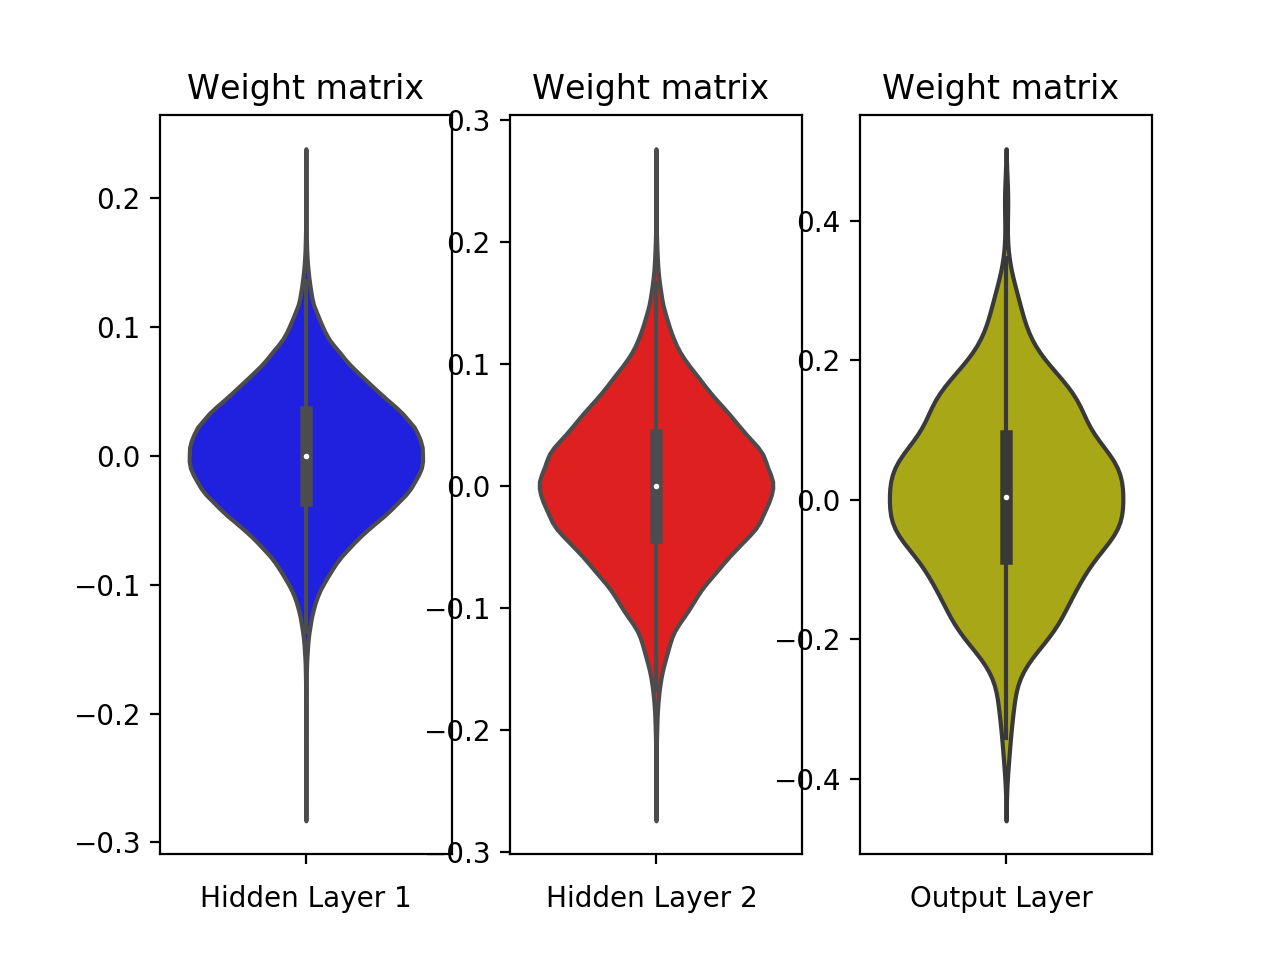

In [23]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Model 3: Input - Sigmoid(BatchNormalization(512)) - Sigmoid(BatchNormalization(128))- Softmax(output) </h3>

In [ ]:
# whenever we talk about batch normalization, we always talk of this w.r.t to some layer. and whenever we talk of
# weights and batch normalization of a layer then those are done just before the layer

# batch normalization is not done on x_is, it is done on the inputs going to the layer i.e after multiplying inputs 
# with weights.

In [11]:
epsilon = 1e-3
def multilayer_perceptron_batch(x, weights, biases):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())        
    
    ############################################################
    # Hidden layer with Sigmoid activation and batch normalization
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) #(x*weights['h1']) + biases['b1']
    
    # Calculate the mean and variance of z1.
    batch_mean_1, batch_var_1 = tf.nn.moments(layer_1,[0])
    
    scale_1 = tf.Variable(tf.ones([n_hidden_1]))
    shift_1 = tf.Variable(tf.zeros([n_hidden_1]))
    
    layer_1 = tf.nn.batch_normalization(layer_1, batch_mean_1, batch_var_1, shift_1, scale_1, epsilon)
    layer_1 = tf.nn.sigmoid(layer_1)
    
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape())        
    
    #####################################################################################
    
    # Hidden layer with Sigmoid activation and batch normalization
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) # (layer_1 * weights['h2']) + biases['b2'] 
    
    # Calculate the mean and variance of z2.
    batch_mean_2, batch_var_2 = tf.nn.moments(layer_2, [0])
    
    scale_2 = tf.Variable(tf.ones([n_hidden_2]))
    shift_2 = tf.Variable(tf.zeros([n_hidden_2]))
    
    layer_2 = tf.nn.batch_normalization(layer_2, batch_mean_2, batch_var_2, shift_2, scale_2, epsilon)
    layer_2 = tf.nn.sigmoid(layer_2)
    print( 'layer_2:', layer_2.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b3:', biases['out'].get_shape())        
    
    ######################################################################################
    
    # output layer with Sigmoid activation 
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] # (layer_2 * weights['out']) + biases['out']    
    out_layer = tf.nn.softmax(out_layer)
    print('out_layer:',out_layer.get_shape())

    return out_layer

<h5>__ Model 3+ AdamOptimizer  __ (Sigmoid + Adam)</h5>

In [12]:
# Since we are using sigmoid activations in hiden layers we will be using weights that are initalized as weights_sgd
y_hat_batch = multilayer_perceptron_batch(x_is, weights_sgd, biases)

cost_batch = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_hat_batch, labels = y_true_is))

optimizer_batch_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_batch)
optimizer_batch_sgdc = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_batch)

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 128) b[h2]: (128,)
layer_2: (?, 128) W[out]: (128, 10) b3: (10,)
out_layer: (?, 10)


<IPython.core.display.Javascript object>


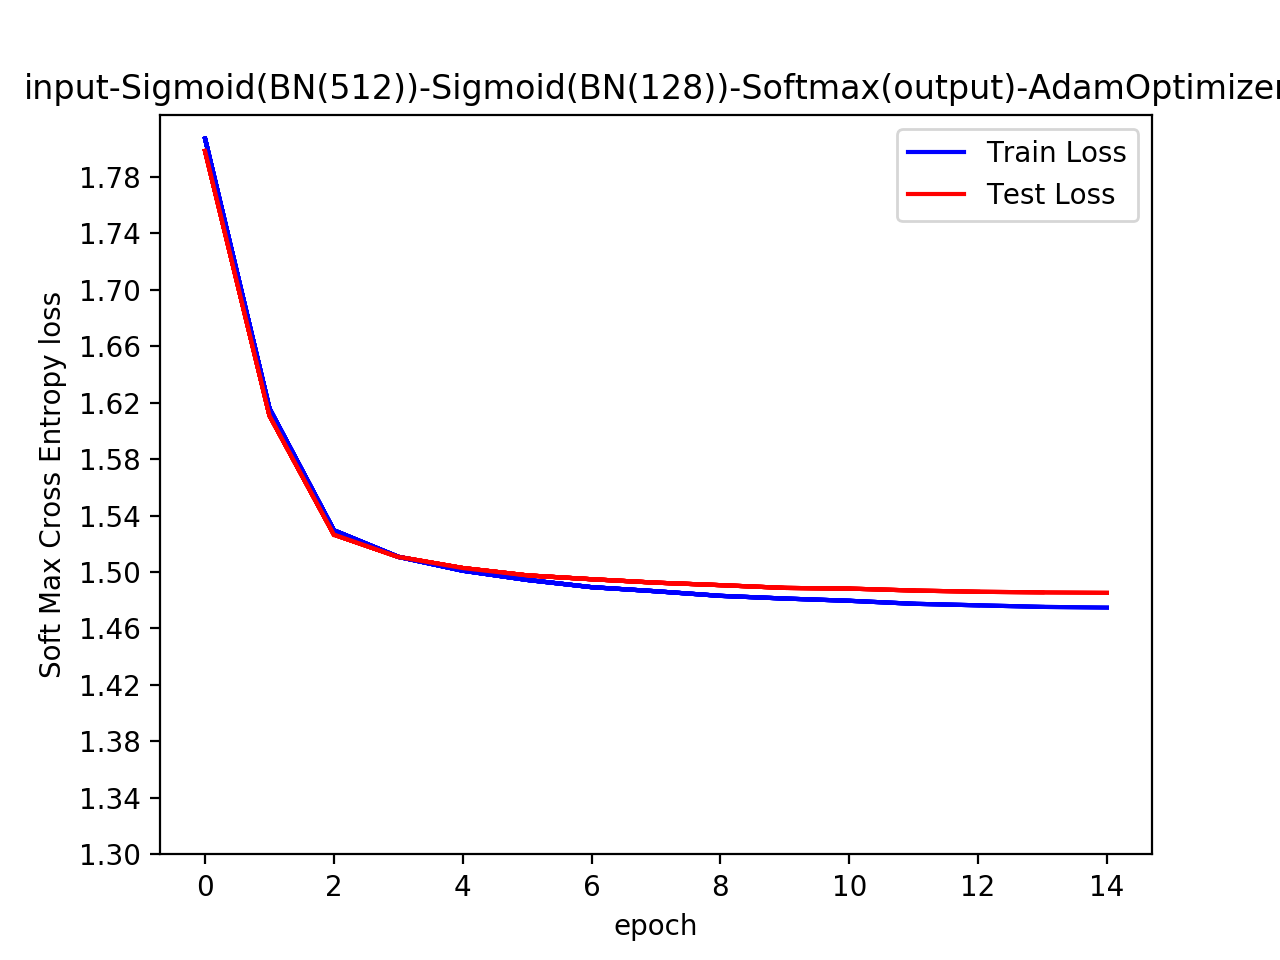

Epoch: 0001 train cost=1.806943386 test cost=1.798202756
Epoch: 0002 train cost=1.615738467 test cost=1.610812023
Epoch: 0003 train cost=1.529513680 test cost=1.526507054
Epoch: 0004 train cost=1.510763316 test cost=1.510710878
Epoch: 0005 train cost=1.500948418 test cost=1.502812023
Epoch: 0006 train cost=1.494406261 test cost=1.497621509
Epoch: 0007 train cost=1.489271108 test cost=1.494892167
Epoch: 0008 train cost=1.486371388 test cost=1.492459729
Epoch: 0009 train cost=1.483121152 test cost=1.490703393
Epoch: 0010 train cost=1.481217694 test cost=1.488745254
Epoch: 0011 train cost=1.479630112 test cost=1.488258736
Epoch: 0012 train cost=1.477512155 test cost=1.486900987
Epoch: 0013 train cost=1.476418587 test cost=1.486013101
Epoch: 0014 train cost=1.475299318 test cost=1.485565439
Epoch: 0015 train cost=1.474797580 test cost=1.485270114
Accuracy: 0.9782


In [14]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    # for plotting graph
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    epochs_list, avg_train_loss_list, avg_test_loss_list = [], [], []
    
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_batch_adam, cost_batch, weights_sgd], feed_dict={x_is: batch_xs, y_true_is: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_batch, feed_dict={x_is: mnist.test.images, y_true_is: mnist.test.labels})
            test_avg_cost += c / total_batch

        epochs_list.append(epoch)
        avg_train_loss_list.append(train_avg_cost)
        avg_test_loss_list.append(test_avg_cost)
        plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax, np.arange(1.3, 1.8, step=0.04), "input-Sigmoid(BN(512))-Sigmoid(BN(128))-Softmax(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax, np.arange(1.3, 1.8, step=0.04), "input-Sigmoid(BN(512))-Sigmoid(BN(128))-Softmax(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_hat_batch,1), tf.argmax(y_true_is,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x_is: mnist.test.images, y_true_is: mnist.test.labels}))

<IPython.core.display.Javascript object>


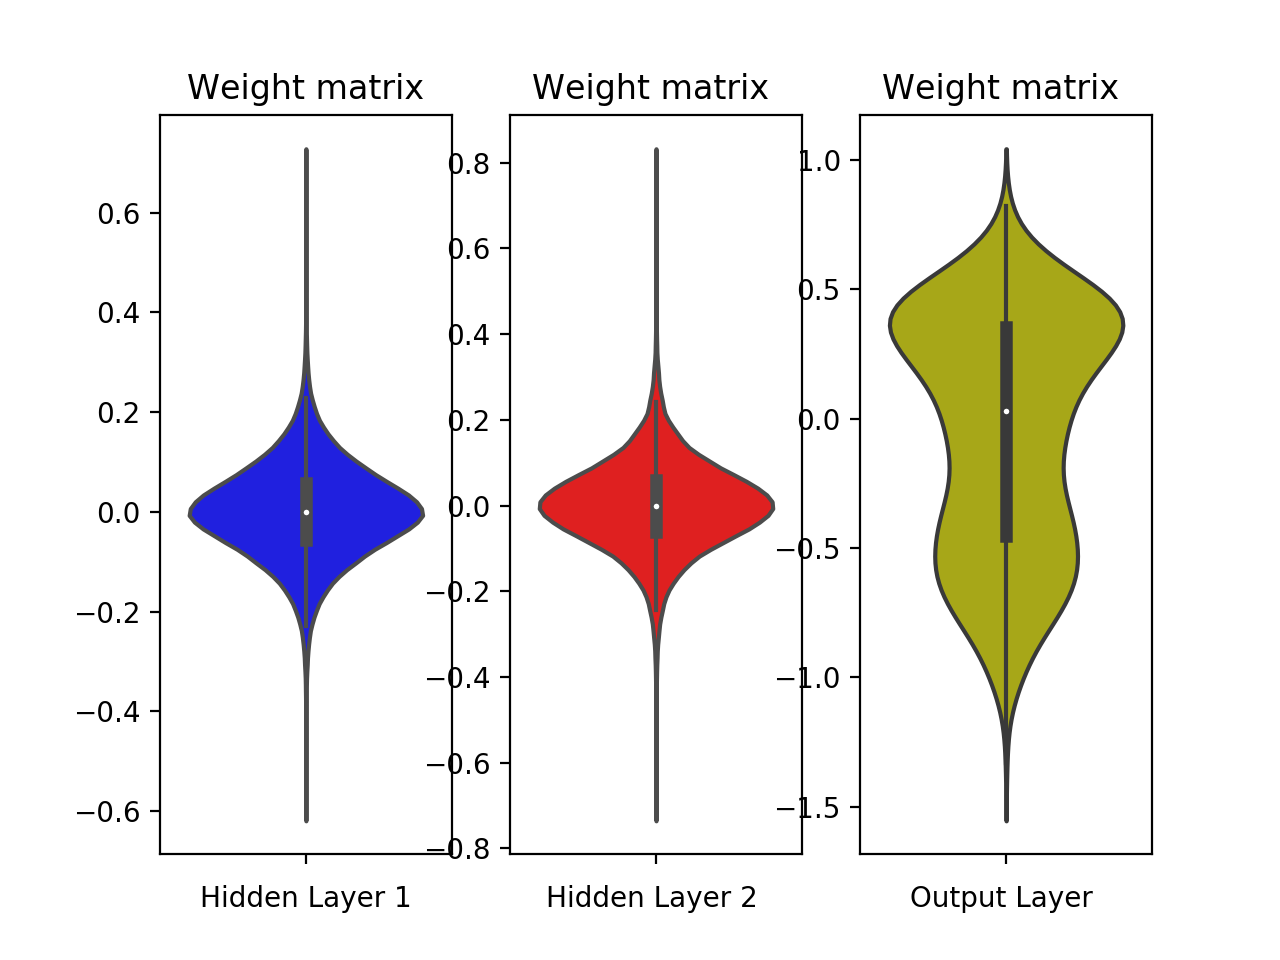

In [15]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h5> __ Model 3 + GradientDescentOptimizer  __ (Sigmoid + SGD) </h5>

<IPython.core.display.Javascript object>


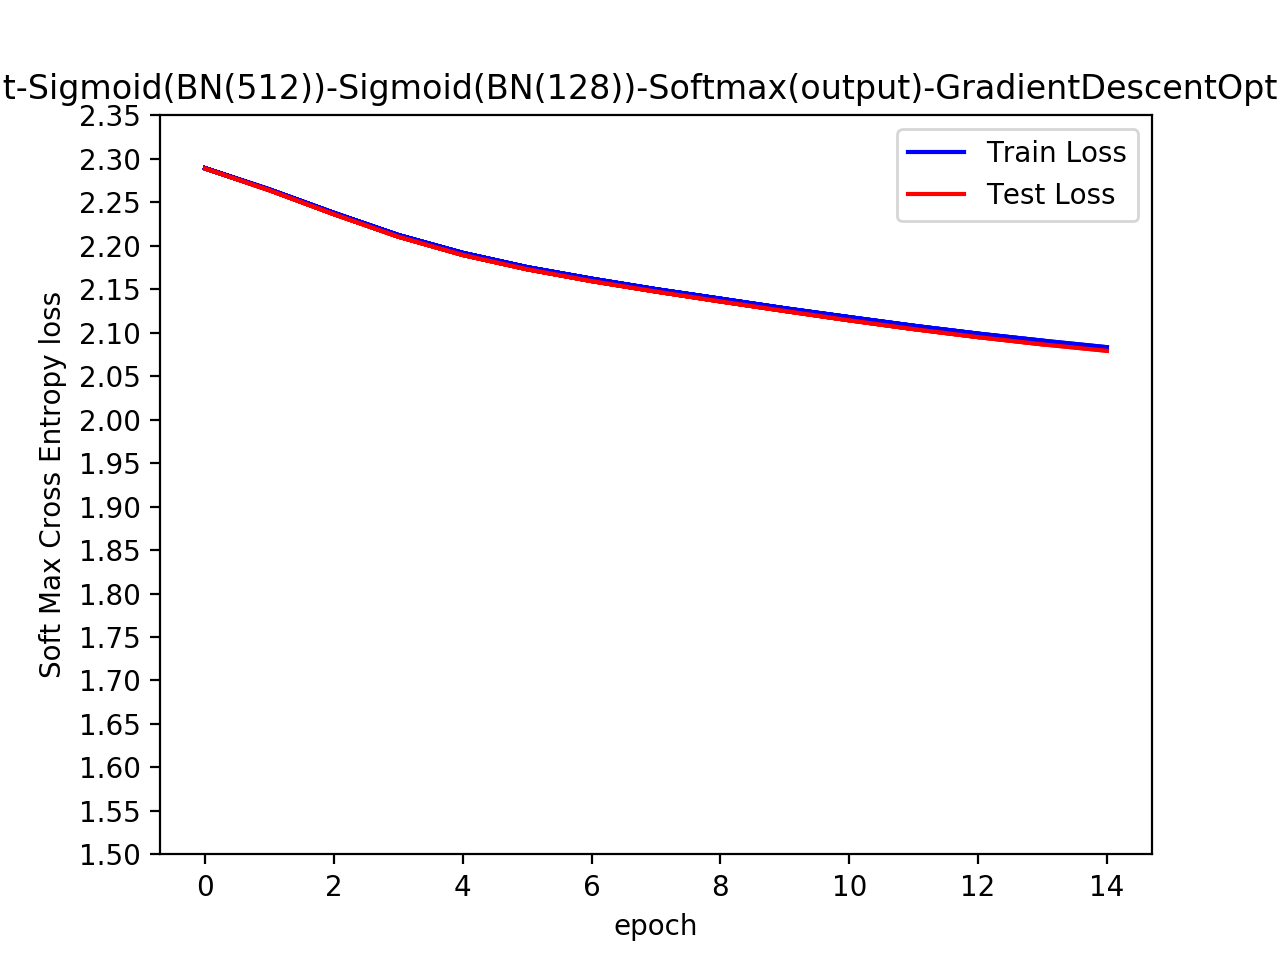

Epoch: 0001 train cost=2.289054796 test cost=2.288784294
Epoch: 0002 train cost=2.264519073 test cost=2.263793893
Epoch: 0003 train cost=2.237618277 test cost=2.236232792
Epoch: 0004 train cost=2.212141551 test cost=2.210372155
Epoch: 0005 train cost=2.191638706 test cost=2.189329758
Epoch: 0006 train cost=2.175203173 test cost=2.172895731
Epoch: 0007 train cost=2.161966433 test cost=2.159294636
Epoch: 0008 train cost=2.149882661 test cost=2.147249681
Epoch: 0009 train cost=2.138979171 test cost=2.135904806
Epoch: 0010 train cost=2.127946128 test cost=2.124889727
Epoch: 0011 train cost=2.117778605 test cost=2.114176634
Epoch: 0012 train cost=2.107865201 test cost=2.104047145
Epoch: 0013 train cost=2.098831296 test cost=2.094821510
Epoch: 0014 train cost=2.090750853 test cost=2.086496516
Epoch: 0015 train cost=2.083249151 test cost=2.079092175
Accuracy: 0.4643


In [16]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    # for plotting graph
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    epochs_list, avg_train_loss_list, avg_test_loss_list = [], [], []
    
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_batch_sgdc, cost_batch, weights_sgd], feed_dict={x_is: batch_xs, y_true_is: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_batch, feed_dict={x_is: mnist.test.images, y_true_is: mnist.test.labels})
            test_avg_cost += c / total_batch

        epochs_list.append(epoch)
        avg_train_loss_list.append(train_avg_cost)
        avg_test_loss_list.append(test_avg_cost)
        plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax, np.arange(1.5, 2.4, step=0.05), "input-Sigmoid(BN(512))-Sigmoid(BN(128))-Softmax(output)-GradientDescentOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax, np.arange(1.5, 2.4, step=0.05), "input-Sigmoid(BN(512))-Sigmoid(BN(128))-Softmax(output)-GradientDescentOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_hat_batch,1), tf.argmax(y_true_is,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x_is: mnist.test.images, y_true_is: mnist.test.labels}))

<IPython.core.display.Javascript object>


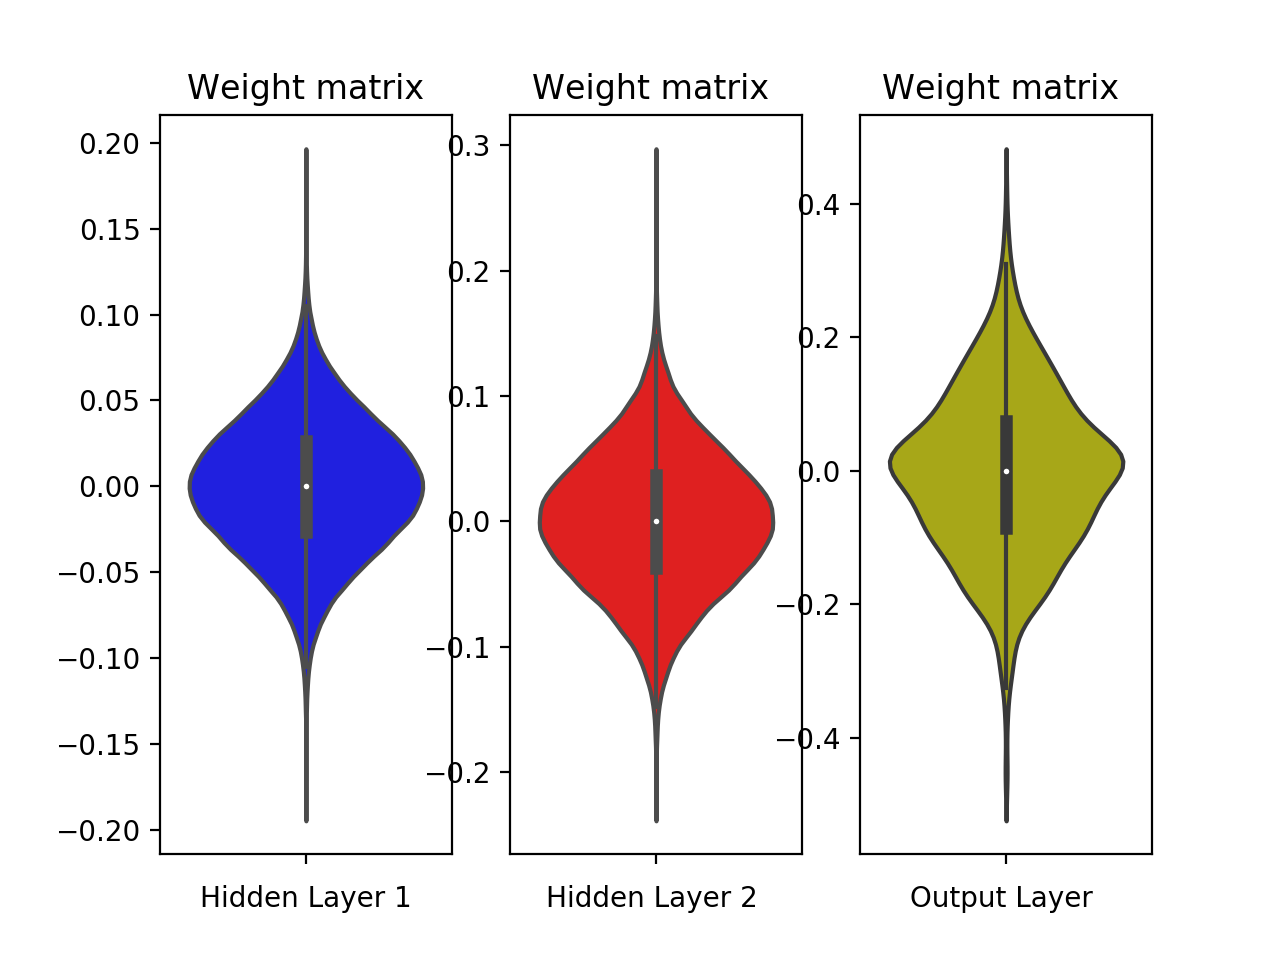

In [17]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Model 4: Input - ReLu(512) - Dropout - ReLu(128)- Dropout -Softmax(output) </h3>

In [9]:
# Create model
def multilayer_perceptron_dropout(x, weights, biases):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())        
    # we are adding a drop out layer after input layers with parameter keep_prob_input
    
    # Hidden layer with ReLu activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) #(x*weights['h1']) + biases['b1']
    layer_1 = tf.nn.relu(layer_1)
    # we are adding a drop out layer after the first hidden layer with parameter keep_prob
    layer_1_drop = tf.nn.dropout(layer_1, keep_prob)
    
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape())        
    
    # Hidden layer with ReLu activation
    layer_2 = tf.add(tf.matmul(layer_1_drop, weights['h2']), biases['b2']) # (layer_1 * weights['h2']) + biases['b2'] 
    layer_2 = tf.nn.relu(layer_2)
    # we are adding a drop out layer after the first hidden layer with parameter keep_prob
    layer_2_drop = tf.nn.dropout(layer_2, keep_prob)
    print( 'layer_2:', layer_2.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b3:', biases['out'].get_shape())        
    
    # Output layer with Sigmoid activation
    out_layer = tf.matmul(layer_2_drop, weights['out']) + biases['out'] # (layer_2 * weights['out']) + biases['out']    
    out_layer = tf.nn.softmax(out_layer)
    print('out_layer:',out_layer.get_shape())

    return out_layer

<h5> __ Model 4 + AdamOptimizer __ (ReLU + Adam) </h5>

In [10]:
# Since we are using Relu activations in hiden layers we will be using weights that are initalized as weights_relu
y_hat_drop = multilayer_perceptron_dropout(x_is, weights_relu, biases)

cost_drop = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_hat_drop, labels = y_true_is))

# there are many optimizers available: https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 
optimizer_drop_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_drop)
optimizer_drop_sgdc = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_drop)


x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 128) b[h2]: (128,)
layer_2: (?, 128) W[out]: (128, 10) b3: (10,)
out_layer: (?, 10)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



<IPython.core.display.Javascript object>


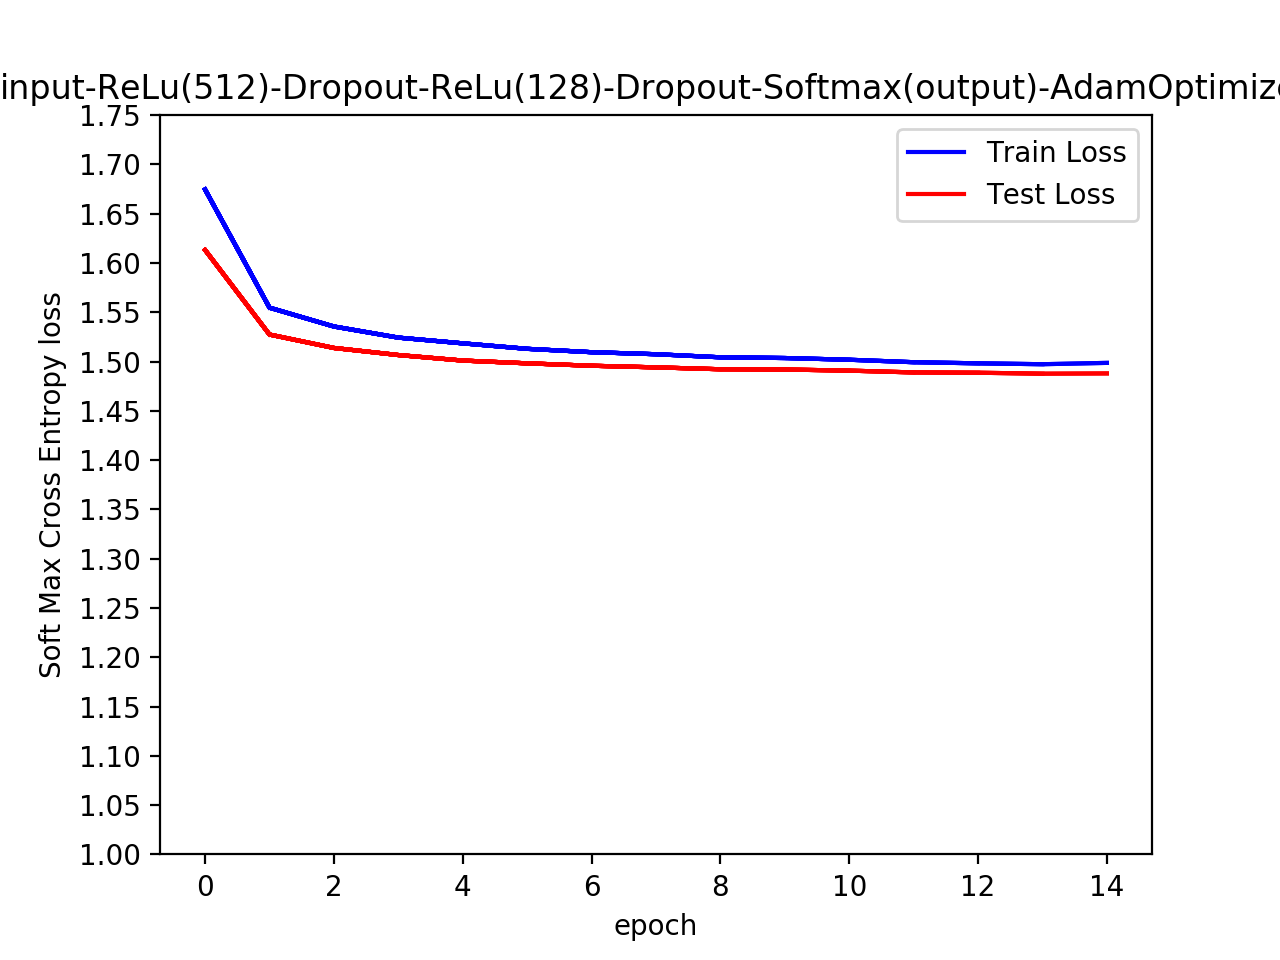

Epoch: 0001 train cost=1.674614801 test cost=1.613247320
Epoch: 0002 train cost=1.554704150 test cost=1.527440871
Epoch: 0003 train cost=1.535609186 test cost=1.513836847
Epoch: 0004 train cost=1.524325058 test cost=1.506661184
Epoch: 0005 train cost=1.518522620 test cost=1.501053175
Epoch: 0006 train cost=1.512957812 test cost=1.498247163
Epoch: 0007 train cost=1.509549246 test cost=1.495793003
Epoch: 0008 train cost=1.507489976 test cost=1.494158613
Epoch: 0009 train cost=1.504364858 test cost=1.492244805
Epoch: 0010 train cost=1.503628313 test cost=1.491974279
Epoch: 0011 train cost=1.501887105 test cost=1.490840665
Epoch: 0012 train cost=1.499388545 test cost=1.489018804
Epoch: 0013 train cost=1.498243162 test cost=1.488706479
Epoch: 0014 train cost=1.497347247 test cost=1.487744722
Epoch: 0015 train cost=1.498700243 test cost=1.487998653
Accuracy: 0.9742


In [11]:
with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    epochs_list, avg_train_loss_list, avg_test_loss_list = [], [], []
    
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_drop_adam, cost_drop, weights_relu], feed_dict={x_is: batch_xs, y_true_is: batch_ys, keep_prob: 0.5})
            train_avg_cost += c / total_batch
            c = sess.run(cost_drop, feed_dict={x_is: mnist.test.images, y_true_is: mnist.test.labels,  keep_prob: 1.0})
            test_avg_cost += c / total_batch

        epochs_list.append(epoch)
        avg_train_loss_list.append(train_avg_cost)
        avg_test_loss_list.append(test_avg_cost)
        plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax,np.arange(1, 1.8, step=0.05), "input-ReLu(512)-Dropout-ReLu(128)-Dropout-Softmax(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax,np.arange(1, 1.8, step=0.05), "input-ReLu(512)-Dropout-ReLu(128)-Dropout-Softmax(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_hat_drop,1), tf.argmax(y_true_is,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x_is: mnist.test.images, y_true_is: mnist.test.labels, keep_prob: 1.0 }))

<IPython.core.display.Javascript object>


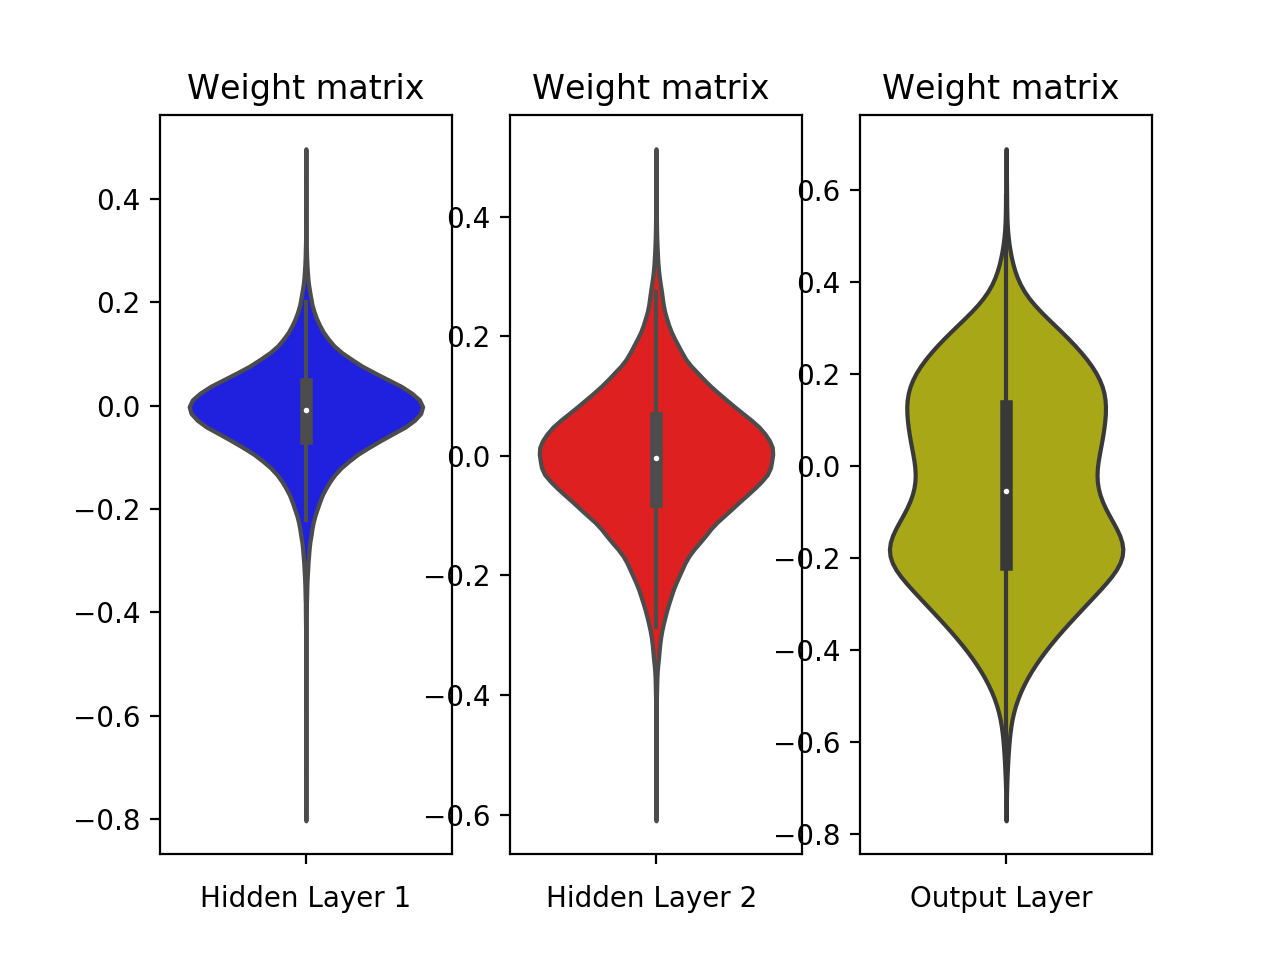

Text(0.5,0,'Output Layer ')

In [12]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
# plt.show()

In [ ]:
# END